In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

import astropy.time
from astropy.io import fits
from maskfill import maskfill

from glob import glob

from reduce import *
plt.style.use('mystyle')

### Skycalc

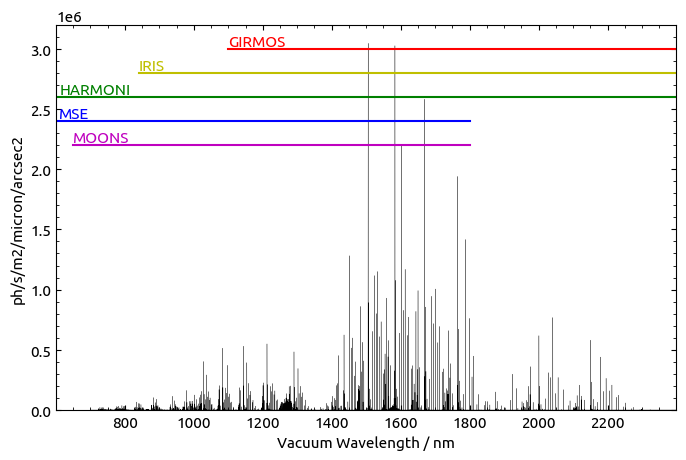

In [ ]:
(x,OH) = np.loadtxt('dataproducts/radiance.dat').T
(_,sky) = np.loadtxt('dataproducts/radiance-sky.dat').T

plt.figure(figsize=(8,5))
plt.plot(x, OH, 'k', lw=0.2)
plt.xlabel('Vacuum Wavelength / nm')
plt.ylabel('ph/s/m2/micron/arcsec2')

plt.plot([1100,2400], [3e6,3e6], 'r')
plt.text(1100, 3e6, 'GIRMOS', color='r', ha='left', va='bottom')
plt.plot([840,2400], [2.8e6,2.8e6], 'y')
plt.text(840, 2.8e6, 'IRIS', color='y', ha='left', va='bottom')
plt.plot([470,2450], [2.6e6,2.6e6], 'g')
plt.text(610, 2.6e6, 'HARMONI', color='g', ha='left', va='bottom')
plt.plot([360,1800], [2.4e6,2.4e6], 'b')
plt.text(610, 2.4e6, 'MSE', color='b', ha='left', va='bottom')
plt.plot([650,1800], [2.2e6,2.2e6], 'm')
plt.text(650, 2.2e6, 'MOONS', color='m', ha='left', va='bottom')

plt.xlim(601,2399)
plt.ylim(0,None)
plt.tick_params(which='both', top=True, right=True)
plt.minorticks_on()

# plt.savefig('thesis/img/skycalc2-annot.pdf', bbox_inches='tight')

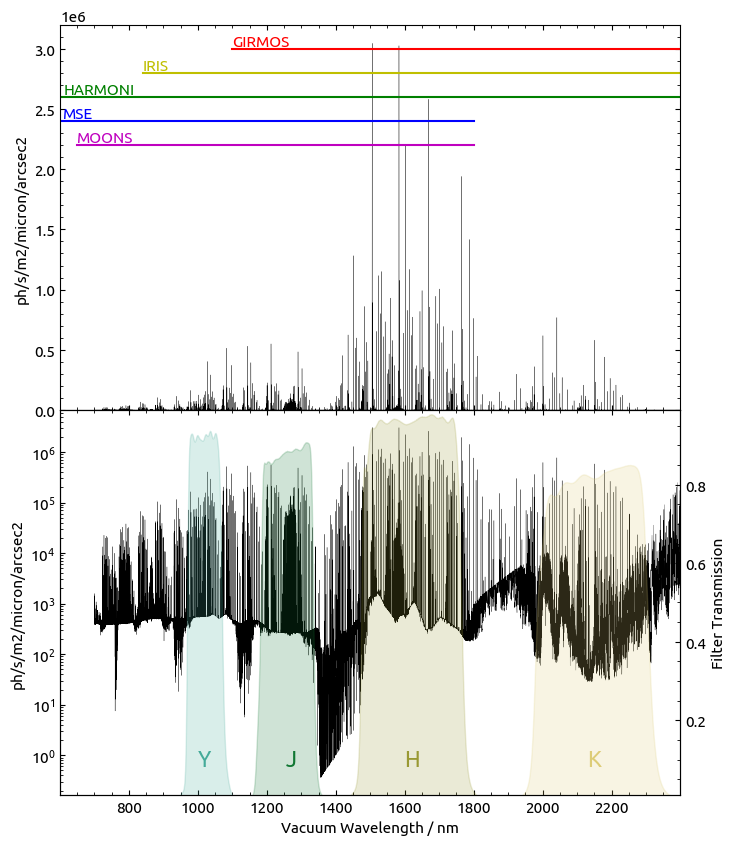

In [ ]:
(x,OH) = np.loadtxt('dataproducts/radiance.dat').T
(_,sky) = np.loadtxt('dataproducts/radiance-sky.dat').T

(xY,Y) = np.loadtxt('data/HAWKI-Y.dat').T
(xJ,J) = np.loadtxt('data/HAWKI-J.dat').T
(xH,H) = np.loadtxt('data/HAWKI-H.dat').T
(xK,K) = np.loadtxt('data/HAWKI-K.dat').T

fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(8,10), sharex=True)
fig.subplots_adjust(hspace=0)

ax0.plot(x, OH, 'k', lw=0.2)
ax0.plot([1100,2400], [3e6,3e6], 'r')
ax0.text(1100, 3e6, 'GIRMOS', color='r', ha='left', va='bottom')
ax0.plot([840,2400], [2.8e6,2.8e6], 'y')
ax0.text(840, 2.8e6, 'IRIS', color='y', ha='left', va='bottom')
ax0.plot([470,2450], [2.6e6,2.6e6], 'g')
ax0.text(610, 2.6e6, 'HARMONI', color='g', ha='left', va='bottom')
ax0.plot([360,1800], [2.4e6,2.4e6], 'b')
ax0.text(610, 2.4e6, 'MSE', color='b', ha='left', va='bottom')
ax0.plot([650,1800], [2.2e6,2.2e6], 'm')
ax0.text(650, 2.2e6, 'MOONS', color='m', ha='left', va='bottom')

ax0.set_xlim(601,2399)
ax0.set_ylim(-1,None)
ax0.tick_params(which='both', top=True, right=True, bottom=True)
ax0.minorticks_on()

ax1.plot(x, sky, 'k', lw=0.2)
ax2 = ax1.twinx()
# ax2.plot(xY/10,Y)
# ax2.plot(xJ/10,J)
# ax2.plot(xH/10,H)
# ax2.plot(xK/10,K)
ax2.fill_between(xY/10, np.zeros(len(Y)), Y, color='C2', alpha=0.2)
ax2.fill_between(xJ/10, np.zeros(len(J)), J, color='C3', alpha=0.2)
ax2.fill_between(xH/10, np.zeros(len(H)), H, color='C4', alpha=0.2)
ax2.fill_between(xK/10, np.zeros(len(K)), K, color='C5', alpha=0.2)
ax2.text(1020, 0.1, 'Y', color='C2', ha='center', va='center', fontsize=16)
ax2.text(1270, 0.1, 'J', color='C3', ha='center', va='center', fontsize=16)
ax2.text(1620, 0.1, 'H', color='C4', ha='center', va='center', fontsize=16)
ax2.text(2150, 0.1, 'K', color='C5', ha='center', va='center', fontsize=16)

ax1.set_yscale('log')
ax1.minorticks_on()
ax2.set_ylim(0.01,0.99)
ax2.minorticks_on()

ax1.set_xlabel('Vacuum Wavelength / nm')
ax0.set_ylabel('ph/s/m2/micron/arcsec2')
ax1.set_ylabel('ph/s/m2/micron/arcsec2')
ax2.set_ylabel('Filter Transmission')

# plt.savefig('jatis/img/skycalc-comb.pdf', bbox_inches='tight')

### Sky + Ar + Filter

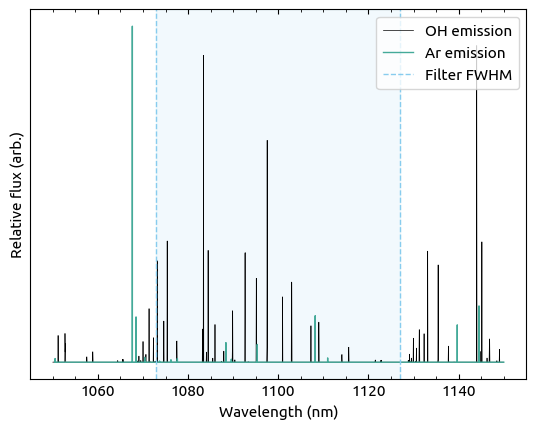

In [ ]:
(x,OH) = np.loadtxt('dataproducts/radiance.dat').T
(_Ar,_x2) = np.loadtxt('dataproducts/Ar2.dat', usecols=(0,1)).T
Ar = []
x2 = []

for i,w in enumerate(_x2):
    w /= 10
    Ar.extend([0,_Ar[i],0])
    x2.extend([w-0.001,w,w+0.001])
    
x2.append(1150)
Ar.append(0)
Ar = np.array(Ar)

ind = np.where(np.logical_and(x>1050,x<1150))[0]

plt.plot(x[ind],OH[ind]/50, lw=0.5, c='k', label='OH emission')
plt.plot(x2,Ar, lw=1, c='C2', label='Ar emission')
plt.axvline(1100-27, c='C1', ls='--', lw=1, label='Filter FWHM')
plt.axvline(1100+27, c='C1', ls='--', lw=1)
plt.axvspan(1100-27, 1100+27, color='C1', alpha=0.1, zorder=0)

plt.minorticks_on()
plt.yticks([])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative flux (arb.)')
plt.legend(loc='upper right')

# plt.savefig('jatis/img/filter-wvl.pdf', bbox_inches='tight')

### Transmission spectra

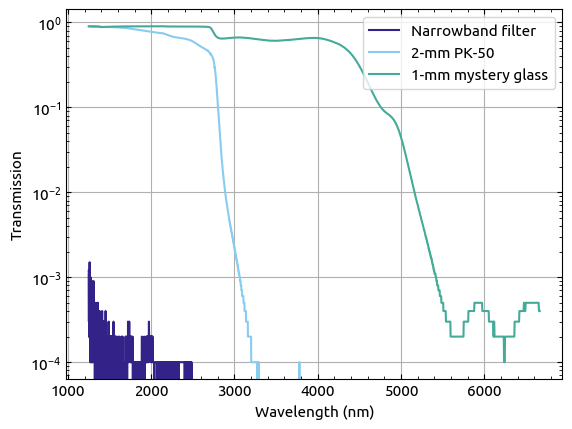

In [ ]:
(wvs,narrow) = np.loadtxt('dataproducts/FTIR/Narrowband filter.csv', skiprows=2, delimiter=',').T/100
wvs = 1e5/wvs
(_,PK50) = np.loadtxt('dataproducts/FTIR/Thick PK50.csv', skiprows=2, delimiter=',').T/100
(_,mystery) = np.loadtxt('dataproducts/FTIR/Thin mystery glass.csv', skiprows=2, delimiter=',').T/100

plt.figure()
plt.plot(wvs, narrow, label='Narrowband filter')
plt.plot(wvs, PK50, label='2-mm PK-50')
plt.plot(wvs, mystery, label='1-mm mystery glass')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.yscale('log')
plt.legend()
plt.grid()
plt.minorticks_on()
# plt.savefig('jatis/img/transmissions.pdf', dpi=300)

### Blackbody

In [ ]:
(wvs,narrow) = np.loadtxt('dataproducts/FTIR/Narrowband filter.csv', skiprows=2, delimiter=',').T/100
wvs = 1e-4/wvs
(_,PK50) = np.loadtxt('dataproducts/FTIR/Thick PK50.csv', skiprows=2, delimiter=',').T/100
(_,mystery) = np.loadtxt('dataproducts/FTIR/Thin mystery glass.csv', skiprows=2, delimiter=',').T/100

narrow[narrow==0.] = 1e-4
PK50[PK50==0.] = 1e-4
mystery[mystery==0.] = 1e-4

trans = narrow*PK50*mystery


h = 6.626e-34      # Planck - J Hz^-1
c = 1.998e8        # speed of light - m s^-1
kB = 1.381e-23     # Boltzmann - J K^-1
# J s^-1 sr^-1 m^-2 m^-1
BB = lambda w,T: 2 * h * c**2 / w**5 / (np.exp((h*c) / (w*kB*T)) - 1)

C:\Users\tgrosson\AppData\Local\Temp\ipykernel_31844\1087281211.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.trapz(BB(wv,81.60), wv) / np.trapz(BB(wv,81.54), wv) * 100 - 100)


1.729722380107873


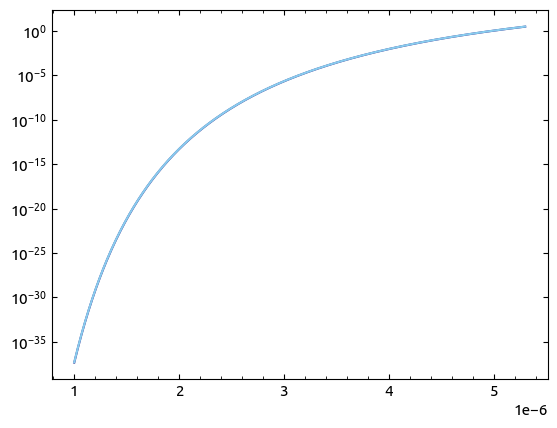

In [20]:
wv = np.linspace(1e-6,5.3e-6,500)
plt.plot(wv, BB(wv,81.54))
plt.plot(wv, BB(wv,81.60))
plt.yscale('log')

print(np.trapz(BB(wv,81.60), wv) / np.trapz(BB(wv,81.54), wv) * 100 - 100)

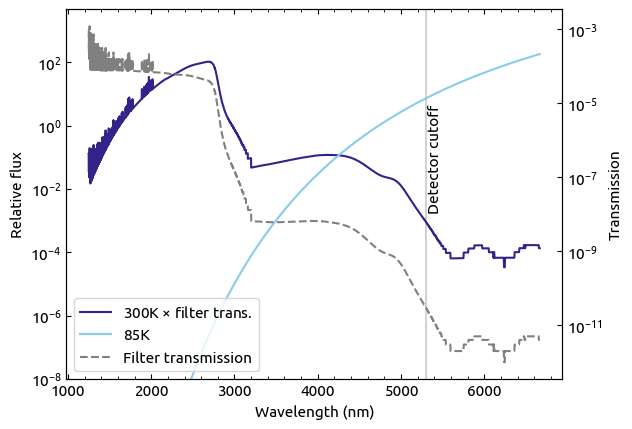

In [ ]:
plt.figure()
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(wvs*1e9, trans*BB(wvs,300), label=r'300K $\times$ filter trans.')
ax1.plot(wvs*1e9, BB(wvs,85), label='85K')
ax1.plot([2000],[0], '--', c='grey', label='Filter transmission')
ax1.set_yscale('log')
ax1.set_ylim(1e-8,None)
ax1.set_ylabel('Relative flux')
ax1.set_xlabel('Wavelength (nm)')
ax1.minorticks_on()
ax1.legend(loc='lower left')

ax2.plot(wvs*1e9, trans, '--', c='grey')
ax2.set_yscale('log')
ax2.set_ylabel('Transmission')
ax2.minorticks_on()

ax1.axvline(5300, c='lightgrey', zorder=0)
ax1.text(5400, 9e-2, 'Detector cutoff', rotation='vertical', ha='center', va='center')

# plt.savefig('jatis/img/blackbodies.pdf')

### Spec comparisons

In [25]:
(wv,nowin_flux,nowin_err) = fits.getdata('dataproducts/spectra/noWin.fits', memmap=False)
(wv,reswin_flux,reswin_err) = fits.getdata('dataproducts/spectra/resetFull_truncated.fits', memmap=False)
(wv,readwin_flux,readwin_err) = fits.getdata('dataproducts/spectra/readFull.fits', memmap=False)

nowin_err /= np.mean(nowin_flux)
reswin_err /= np.mean(reswin_flux)
readwin_err /= np.mean(readwin_flux)
nowin_flux /= np.mean(nowin_flux)
reswin_flux /= np.mean(reswin_flux)
readwin_flux /= np.mean(readwin_flux)

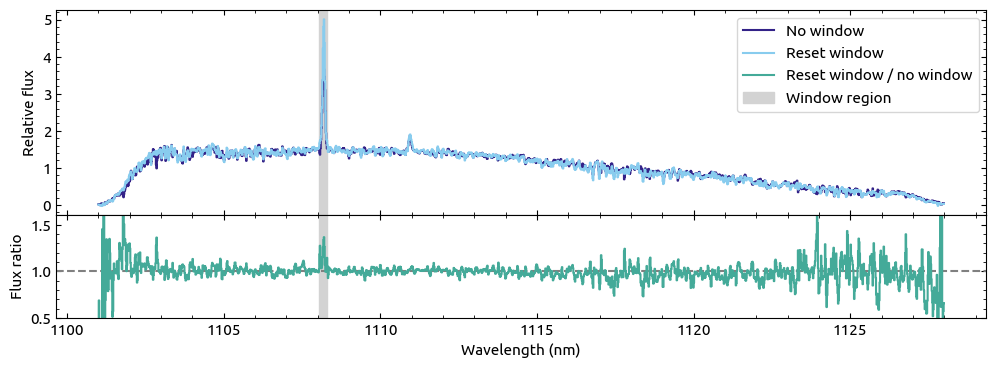

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,4), sharex=True, gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(hspace=0)
ax0.plot(wv, nowin_flux, ds='steps-mid', label='No window')
ax0.plot(wv, reswin_flux, ds='steps-mid', label='Reset window')
ax0.plot([1105], [0], label='Reset window / no window')
ax0.axvspan(1108.05,1108.31, color='lightgrey', zorder=0, label='Window region')
ax0.set_ylabel('Relative flux')
ax0.minorticks_on()
ax0.legend()
# ax0.xlim(1107.7,1108.7)

ax1.axhline(1, ls='--', color='grey')
ax1.plot(wv, reswin_flux/nowin_flux, ds='steps-mid', c='C2')
ax1.axvspan(1108.05,1108.31, color='lightgrey', zorder=0)
ax1.set_ylabel('Flux ratio')
ax1.set_xlabel('Wavelength (nm)')
ax1.minorticks_on()
ax1.set_ylim(0.5,1.6)
# fig.savefig('jatis/img/flux-nowin-reswin.pdf', dpi=300, bbox_inches='tight')

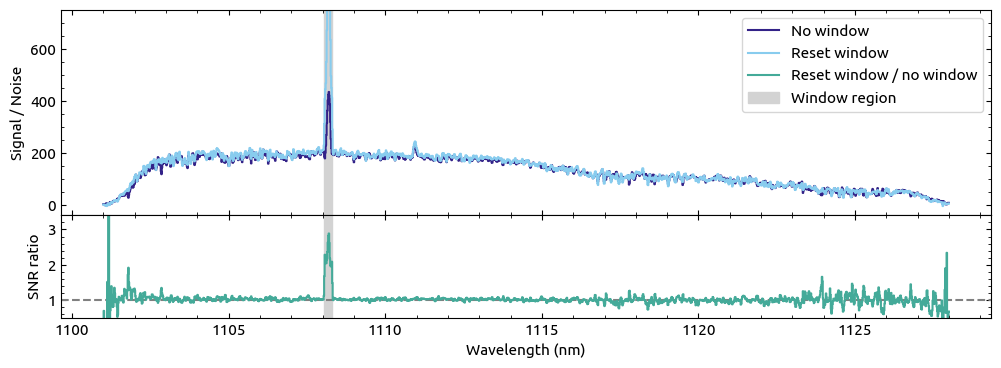

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,4), sharex=True, gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(hspace=0)
ax0.plot(wv, nowin_flux/nowin_err, ds='steps-mid', label='No window')
ax0.plot(wv, reswin_flux/reswin_err, ds='steps-mid', label='Reset window')
ax0.plot([1105], [0], label='Reset window / no window')
ax0.axvspan(1108.05,1108.31, color='lightgrey', zorder=0, label='Window region')
ax0.set_ylabel('Signal / Noise')
ax0.minorticks_on()
ax0.legend()
ax0.set_ylim(-40,749)

ax1.axhline(1, ls='--', color='grey')
ax1.plot(wv, (reswin_flux/reswin_err)/(nowin_flux/nowin_err), ds='steps-mid', c='C2')
ax1.axvspan(1108.05,1108.31, color='lightgrey', zorder=0)
ax1.set_ylabel('SNR ratio')
ax1.set_xlabel('Wavelength (nm)')
ax1.minorticks_on()
ax1.set_ylim(0.5,3.4)
# fig.savefig('jatis/img/SNR-nowin-reswin.pdf', dpi=300, bbox_inches='tight')

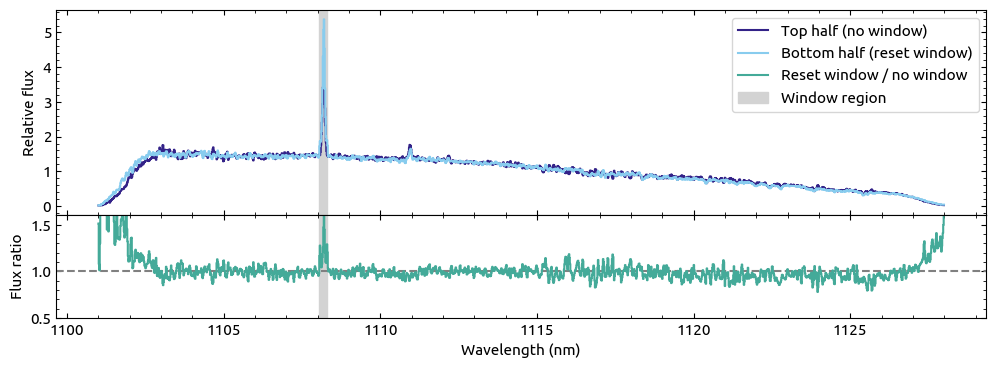

In [ ]:
(wv,resTop_flux,resTop_err) = fits.getdata('dataproducts/spectra/resetHalf_top.fits', memmap=False)
(wv,resBot_flux,resBot_err) = fits.getdata('dataproducts/spectra/resetHalf_bot.fits', memmap=False)
(wv,readBot_flux,readBot_err) = fits.getdata('dataproducts/spectra/readhalf_bot.fits', memmap=False)

resTop_err /= np.mean(resTop_flux)
resBot_err /= np.mean(resBot_flux)
readBot_err /= np.mean(readBot_flux)
resTop_flux /= np.mean(resTop_flux)
resBot_flux /= np.mean(resBot_flux)
readBot_flux /= np.mean(readBot_flux)

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,4), sharex=True, gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(hspace=0)
ax0.plot(wv, resTop_flux, ds='steps-mid', label='Top half (no window)')
ax0.plot(wv, resBot_flux, ds='steps-mid', label='Bottom half (reset window)')
ax0.plot([1105], [0], label='Reset window / no window')
ax0.axvspan(1108.05,1108.31, color='lightgrey', zorder=0, label='Window region')
ax0.set_ylabel('Relative flux')
ax0.minorticks_on()
ax0.legend()
# ax0.xlim(1107.7,1108.7)

ax1.axhline(1, ls='--', color='grey')
ax1.plot(wv, resBot_flux/resTop_flux, ds='steps-mid', c='C2')
ax1.axvspan(1108.05,1108.31, color='lightgrey', zorder=0)
ax1.set_ylabel('Flux ratio')
ax1.set_xlabel('Wavelength (nm)')
ax1.minorticks_on()
ax1.set_ylim(0.5,1.6)
# fig.savefig('jatis/img/flux-resTop-resBot.pdf', dpi=300, bbox_inches='tight')

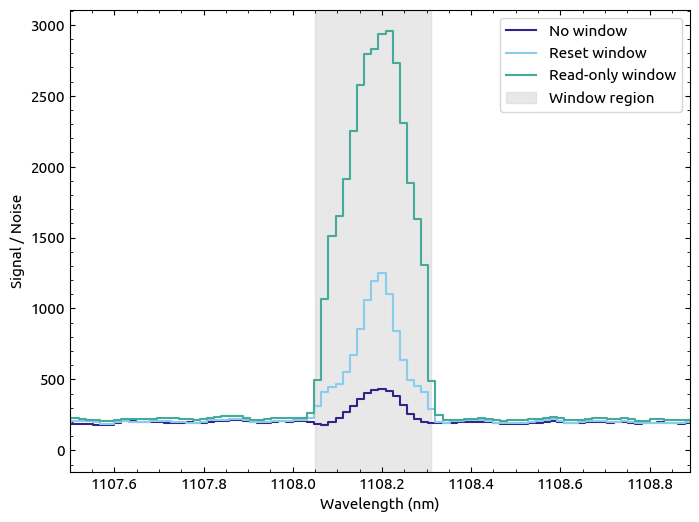

In [ ]:
(wv,nowin_flux,nowin_err) = fits.getdata('dataproducts/spectra/noWin.fits', memmap=False)
(wv,reswin_flux,reswin_err) = fits.getdata('dataproducts/spectra/resetFull_truncated.fits', memmap=False)
(wv,readwin_flux,readwin_err) = fits.getdata('dataproducts/spectra/readFull.fits', memmap=False)

nowin_err /= np.mean(nowin_flux)
reswin_err /= np.mean(reswin_flux)
readwin_err /= np.mean(readwin_flux)
nowin_flux /= np.mean(nowin_flux)
reswin_flux /= np.mean(reswin_flux)
readwin_flux /= np.mean(readwin_flux)

plt.figure(figsize=(8,6))
plt.plot(wv, nowin_flux/nowin_err, ds='steps-mid', label='No window')
plt.plot(wv, reswin_flux/reswin_err, ds='steps-mid', label='Reset window')
plt.plot(wv, readwin_flux/readwin_err, ds='steps-mid', label='Read-only window')
plt.axvspan(1108.05,1108.31, color='lightgrey', alpha=0.5, zorder=0, label='Window region')

plt.xlim(1107.5,1108.89)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Signal / Noise')
plt.minorticks_on()
plt.legend()
# plt.savefig('jatis/img/SNR-no-read-res.pdf', bbox_inches='tight')

### All spectra

In [3]:
(wv,nowin_flux,nowin_err) = fits.getdata('dataproducts/spectra/noWin.fits', memmap=False)
(_,readwin_flux,readwin_err) = fits.getdata('dataproducts/spectra/readFull.fits', memmap=False)
(_,reswin_flux,reswin_err) = fits.getdata('dataproducts/spectra/resetFull.fits', memmap=False)
(_,readtop_flux,readtop_err) = fits.getdata('dataproducts/spectra/readHalf_top.fits', memmap=False)
(_,readbot_flux,readbot_err) = fits.getdata('dataproducts/spectra/readHalf_bot.fits', memmap=False)
(_,restop_flux,restop_err) = fits.getdata('dataproducts/spectra/resetHalf_top.fits', memmap=False)
(_,resbot_flux,resbot_err) = fits.getdata('dataproducts/spectra/resetHalf_bot.fits', memmap=False)
(_,restwo_flux,restwo_err) = fits.getdata('dataproducts/spectra/resetTwo.fits', memmap=False)

nowin_err /= np.mean(nowin_flux)
readwin_err /= np.mean(readwin_flux)
reswin_err /= np.mean(reswin_flux)
readtop_err /= np.mean(readtop_flux)
readbot_err /= np.mean(readbot_flux)
restop_err /= np.mean(restop_flux)
resbot_err /= np.mean(resbot_flux)
restwo_err /= np.mean(restwo_flux)

nowin_flux /= np.mean(nowin_flux)
readwin_flux /= np.mean(readwin_flux)
reswin_flux /= np.mean(reswin_flux)
readtop_flux /= np.mean(readtop_flux)
readbot_flux /= np.mean(readbot_flux)
restop_flux /= np.mean(restop_flux)
resbot_flux /= np.mean(resbot_flux)
restwo_flux /= np.mean(restwo_flux)

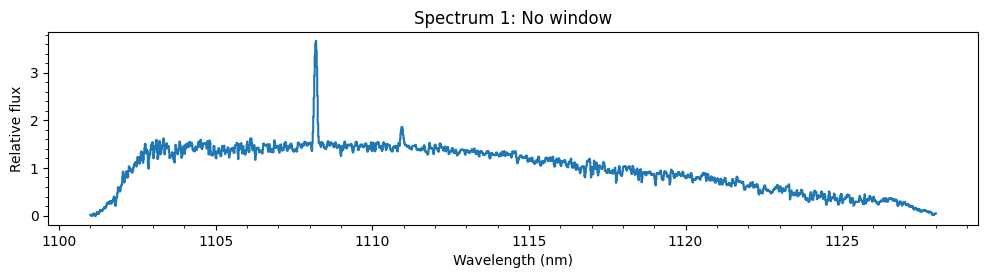

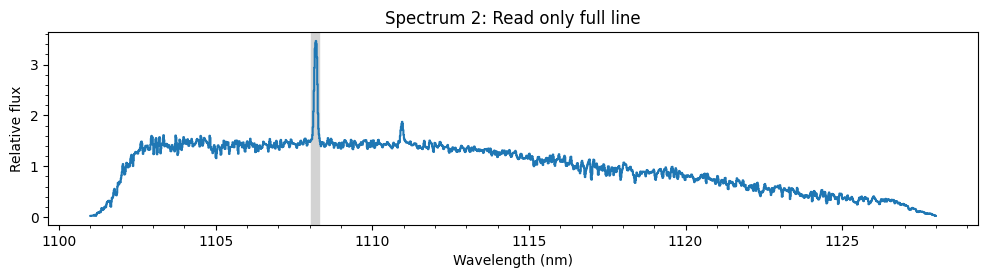

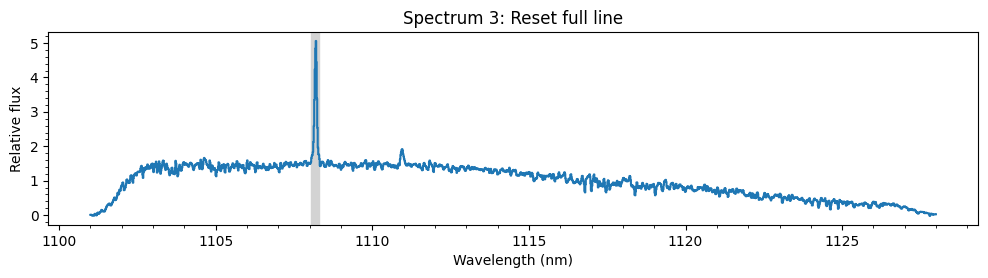

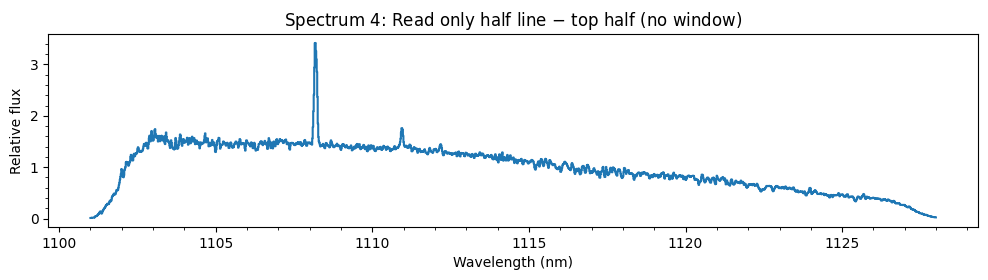

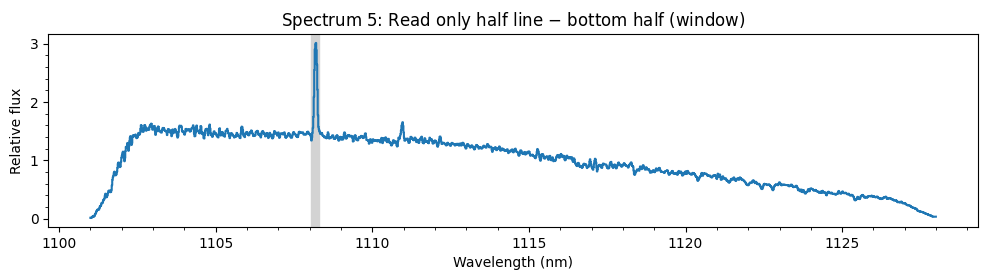

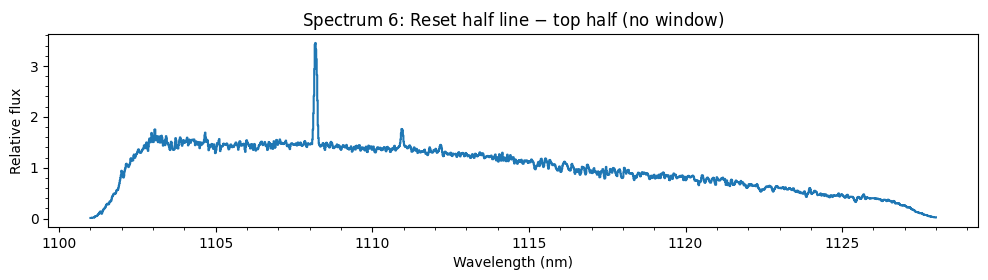

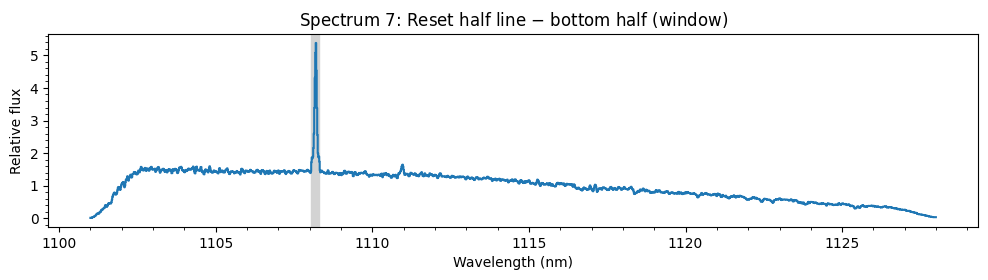

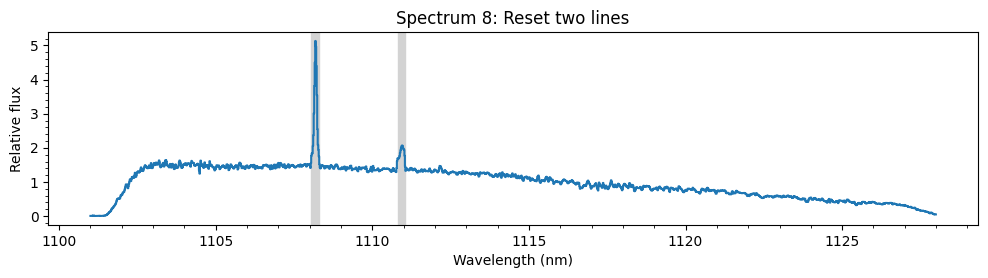

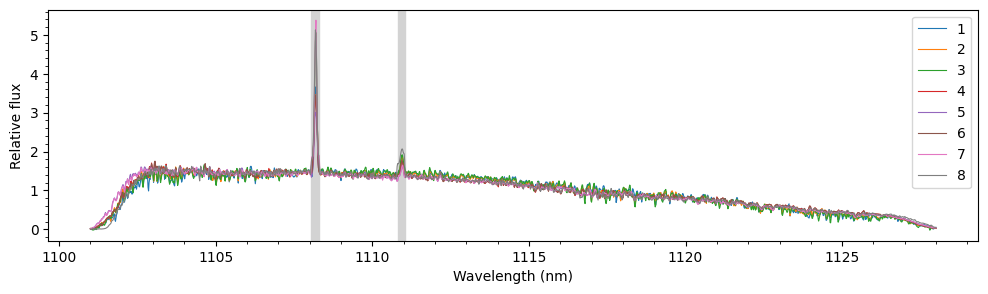

In [10]:
def doplot(spec, title='', win=True, win2=False):
    fig = plt.figure(figsize=(12,2.5))
    plt.plot(wv, spec, ds='steps-mid')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Relative flux')
    plt.minorticks_on()
    plt.title(title)
    if win:
        plt.axvspan(1108.05,1108.31, color='lightgrey', zorder=0)
    if win2:
        plt.axvspan(1110.814,1111.040, color='lightgrey', zorder=0)
    return fig

fig = doplot(nowin_flux, 'Spectrum 1: No window', False)
fig.savefig('thesis/img/spec1.pdf', bbox_inches='tight')
fig = doplot(readwin_flux, 'Spectrum 2: Read only full line')
fig.savefig('thesis/img/spec2.pdf', bbox_inches='tight')
fig = doplot(reswin_flux, 'Spectrum 3: Reset full line')
fig.savefig('thesis/img/spec3.pdf', bbox_inches='tight')
fig = doplot(readtop_flux, r'Spectrum 4: Read only half line $-$ top half (no window)', False)
fig.savefig('thesis/img/spec4.pdf', bbox_inches='tight')
fig = doplot(readbot_flux, r'Spectrum 5: Read only half line $-$ bottom half (window)')
fig.savefig('thesis/img/spec5.pdf', bbox_inches='tight')
fig = doplot(restop_flux, r'Spectrum 6: Reset half line $-$ top half (no window)', False)
fig.savefig('thesis/img/spec6.pdf', bbox_inches='tight')
fig = doplot(resbot_flux, 'Spectrum 7: Reset half line $-$ bottom half (window)')
fig.savefig('thesis/img/spec7.pdf', bbox_inches='tight')
fig = doplot(restwo_flux, 'Spectrum 8: Reset two lines', True, True)
fig.savefig('thesis/img/spec8.pdf', bbox_inches='tight')

plt.figure(figsize=(12,3))
plt.plot(wv, nowin_flux, label='1', lw=0.8)
plt.plot(wv, readwin_flux, label='2', lw=0.8)
plt.plot(wv, reswin_flux, label='3', lw=0.8)
plt.plot(wv, readtop_flux, label='4', lw=0.8)
plt.plot(wv, readbot_flux, label='5', lw=0.8)
plt.plot(wv, restop_flux, label='6', lw=0.8)
plt.plot(wv, resbot_flux, label='7', lw=0.8)
plt.plot(wv, restwo_flux, label='8', lw=0.8)

plt.axvspan(1108.05,1108.31, color='lightgrey', zorder=0)
plt.axvspan(1110.814,1111.040, color='lightgrey', zorder=0)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative flux')
plt.minorticks_on()
plt.legend()
plt.savefig('thesis/img/specall.pdf', bbox_inches='tight')

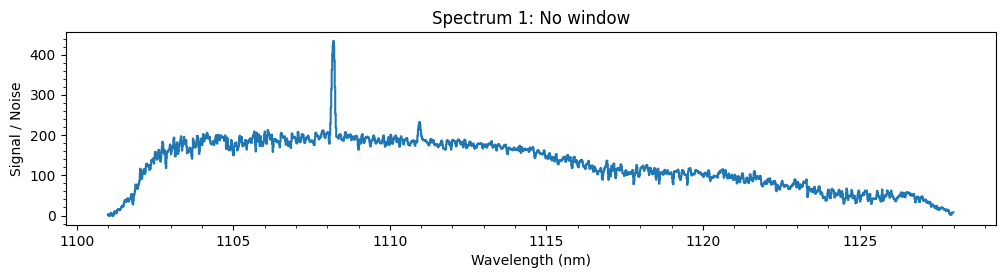

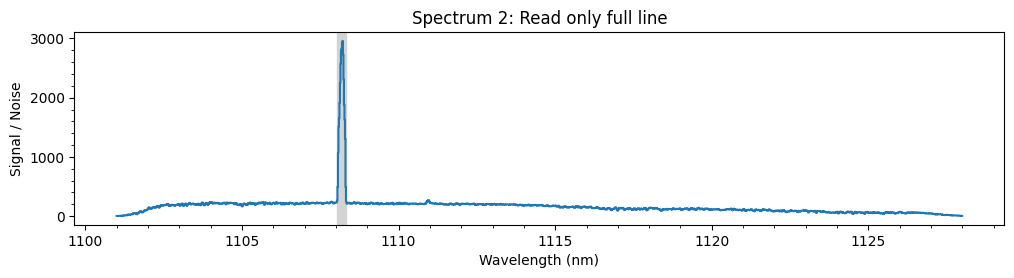

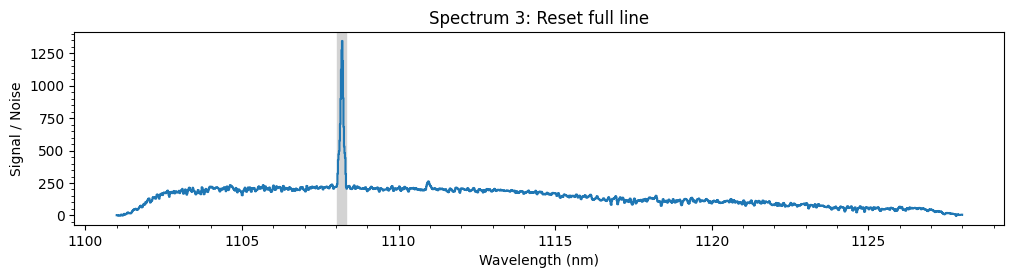

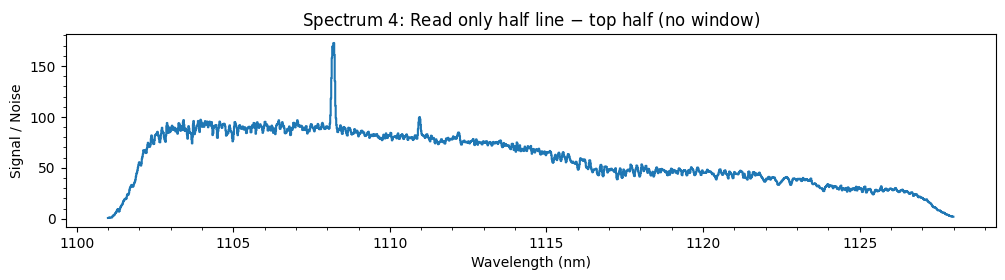

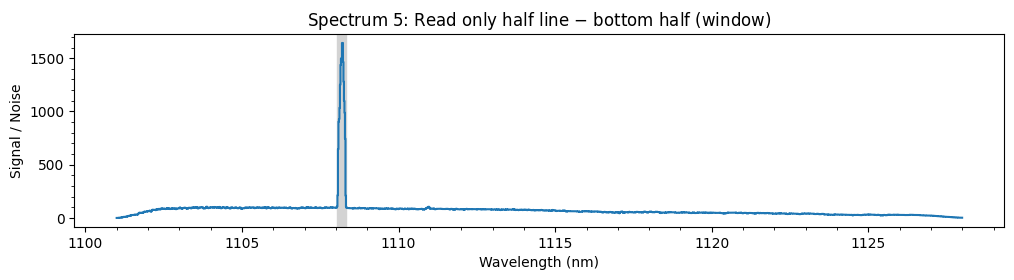

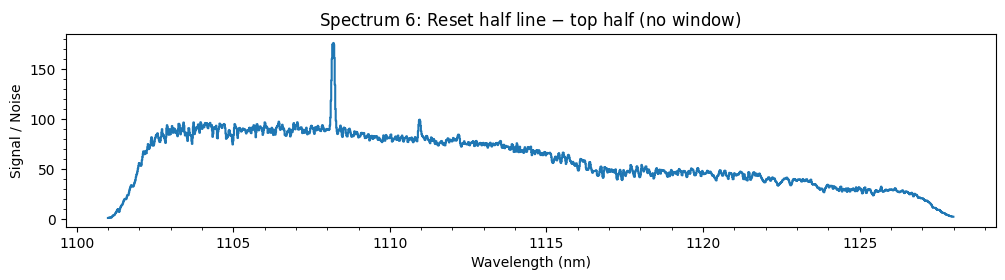

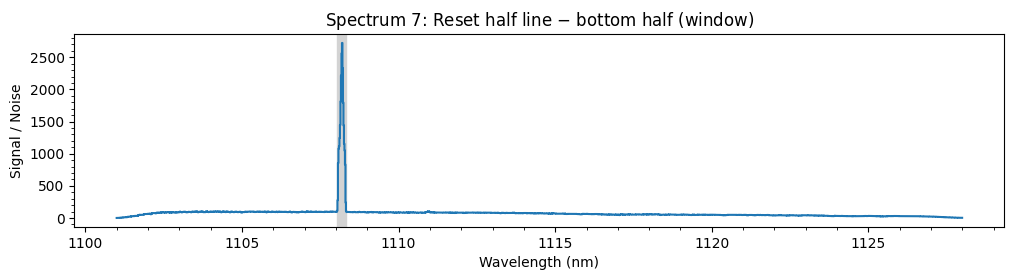

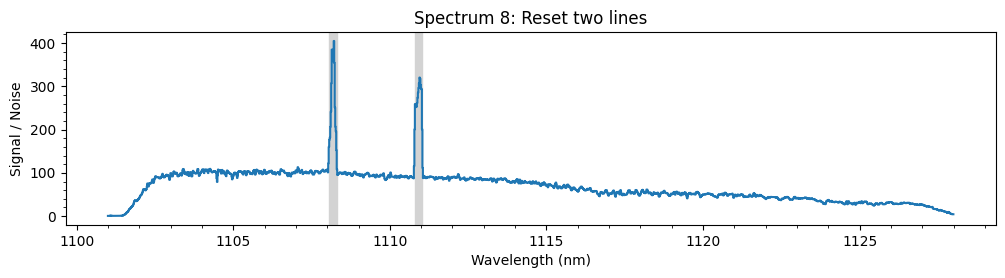

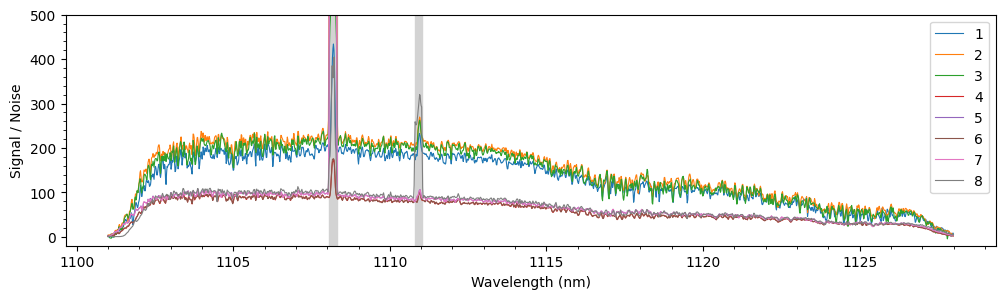

In [11]:
def doplot(spec, title='', win=True, win2=False):
    fig = plt.figure(figsize=(12,2.5))
    plt.plot(wv, spec, ds='steps-mid')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Signal / Noise')
    plt.minorticks_on()
    plt.title(title)
    if win:
        plt.axvspan(1108.05,1108.31, color='lightgrey', zorder=0)
    if win2:
        plt.axvspan(1110.814,1111.040, color='lightgrey', zorder=0)
    return fig

fig = doplot(nowin_flux/nowin_err, 'Spectrum 1: No window', False)
fig.savefig('thesis/img/SNR1.pdf', bbox_inches='tight')
fig = doplot(readwin_flux/readwin_err, 'Spectrum 2: Read only full line')
fig.savefig('thesis/img/SNR2.pdf', bbox_inches='tight')
fig = doplot(reswin_flux/reswin_err, 'Spectrum 3: Reset full line')
fig.savefig('thesis/img/SNR3.pdf', bbox_inches='tight')
fig = doplot(readtop_flux/readtop_err, r'Spectrum 4: Read only half line $-$ top half (no window)', False)
fig.savefig('thesis/img/SNR4.pdf', bbox_inches='tight')
fig = doplot(readbot_flux/readbot_err, r'Spectrum 5: Read only half line $-$ bottom half (window)')
fig.savefig('thesis/img/SNR5.pdf', bbox_inches='tight')
fig = doplot(restop_flux/restop_err, r'Spectrum 6: Reset half line $-$ top half (no window)', False)
fig.savefig('thesis/img/SNR6.pdf', bbox_inches='tight')
fig = doplot(resbot_flux/resbot_err, 'Spectrum 7: Reset half line $-$ bottom half (window)')
fig.savefig('thesis/img/SNR7.pdf', bbox_inches='tight')
fig = doplot(restwo_flux/restwo_err, 'Spectrum 8: Reset two lines', True, True)
fig.savefig('thesis/img/SNR8.pdf', bbox_inches='tight')

plt.figure(figsize=(12,3))
plt.plot(wv, nowin_flux/nowin_err, label='1', lw=0.8)
plt.plot(wv, readwin_flux/readwin_err, label='2', lw=0.8)
plt.plot(wv, reswin_flux/reswin_err, label='3', lw=0.8)
plt.plot(wv, readtop_flux/readtop_err, label='4', lw=0.8)
plt.plot(wv, readbot_flux/readbot_err, label='5', lw=0.8)
plt.plot(wv, restop_flux/restop_err, label='6', lw=0.8)
plt.plot(wv, resbot_flux/resbot_err, label='7', lw=0.8)
plt.plot(wv, restwo_flux/restwo_err, label='8', lw=0.8)

plt.axvspan(1108.05,1108.31, color='lightgrey', zorder=0)
plt.axvspan(1110.814,1111.040, color='lightgrey', zorder=0)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Signal / Noise')
plt.minorticks_on()
plt.legend()
plt.ylim(-20,500)
plt.savefig('thesis/img/SNRall.pdf', bbox_inches='tight')